In [1]:
%pip install pandas numpy matplotlib seaborn scikit-learn scipy


  Using cached pandas-2.3.0-cp311-cp311-win_amd64.whl.metadata (19 kB)
  Using cached numpy-2.3.0-cp311-cp311-win_amd64.whl.metadata (60 kB)
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached scipy-1.15.3-cp311-cp311-win_amd64.whl.metadata (60 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached contourpy-1.3.2-cp311-cp311-win_amd64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.58.2-cp311-cp311-win_amd64.whl.metadata (108 kB)
  Using cached kiwisolver-1.4.8-cp311-cp311-win_amd64.whl.metadata (6.3 kB)
  Using cached pillow-11.2.1-cp311-cp311-win_amd64.whl.metadata (9.1 kB)
  Using cached pyparsing-3.2.3-py3-none-any.whl.metadata (5.0 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
Using cached pandas-2.3.0-cp311-cp311-win_amd64.whl (11.1 MB)
Using cached numpy-2.3.0-cp31

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist
import warnings
warnings.filterwarnings('ignore')

data = pd.read_csv(r'C:\Users\KIIT\Desktop\ibm\Country-data.csv')

print("Dataset Shape:", data.shape)
print("\nFirst 5 rows:")
print(data.head())
print("\nDataset Info:")
print(data.info())
print("\nMissing Values:")
print(data.isnull().sum())
print("\nDescriptive Statistics:")
print(data.describe())


Dataset Shape: (167, 10)

First 5 rows:
               country  child_mort  exports  health  imports  income  \
0          Afghanistan        90.2     10.0    7.58     44.9    1610   
1              Albania        16.6     28.0    6.55     48.6    9930   
2              Algeria        27.3     38.4    4.17     31.4   12900   
3               Angola       119.0     62.3    2.85     42.9    5900   
4  Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   

   inflation  life_expec  total_fer   gdpp  
0       9.44        56.2       5.82    553  
1       4.49        76.3       1.65   4090  
2      16.10        76.5       2.89   4460  
3      22.40        60.1       6.16   3530  
4       1.44        76.8       2.13  12200  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mor

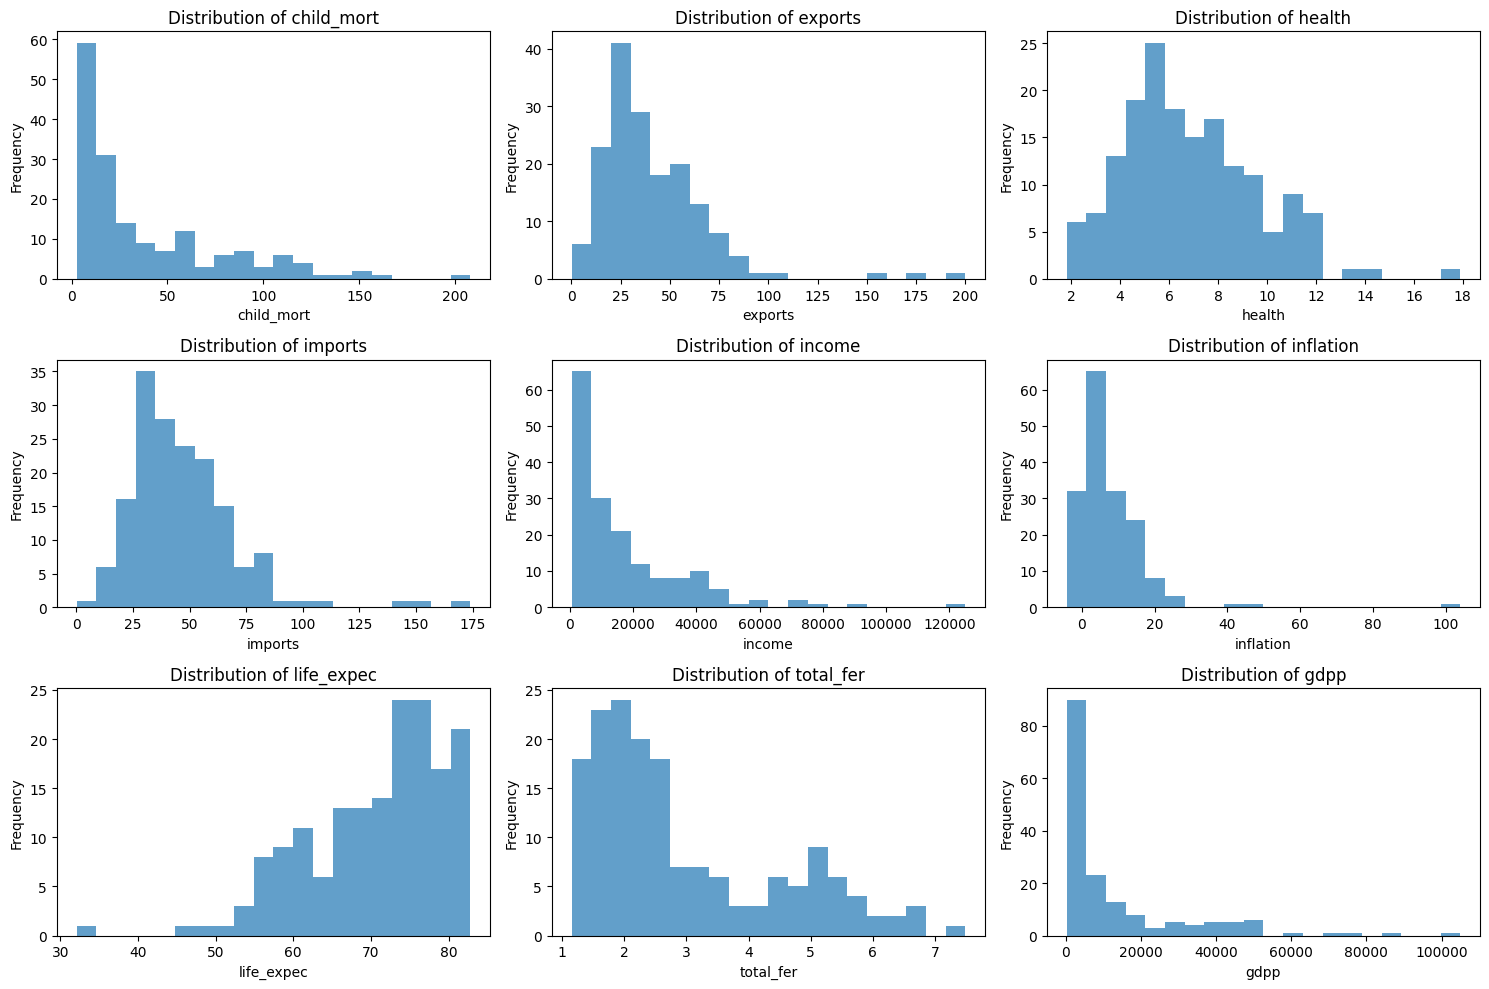

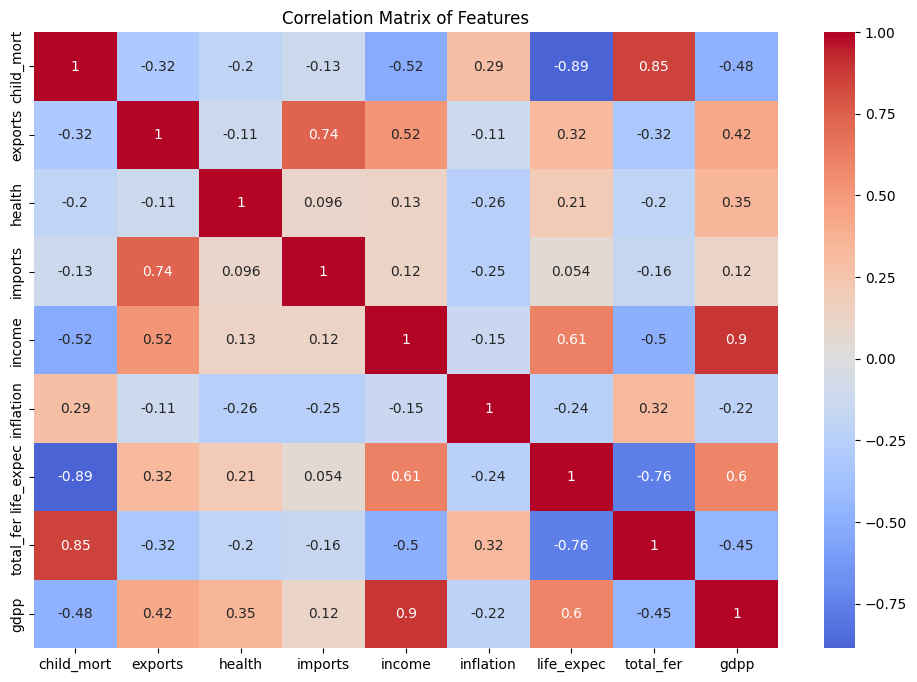

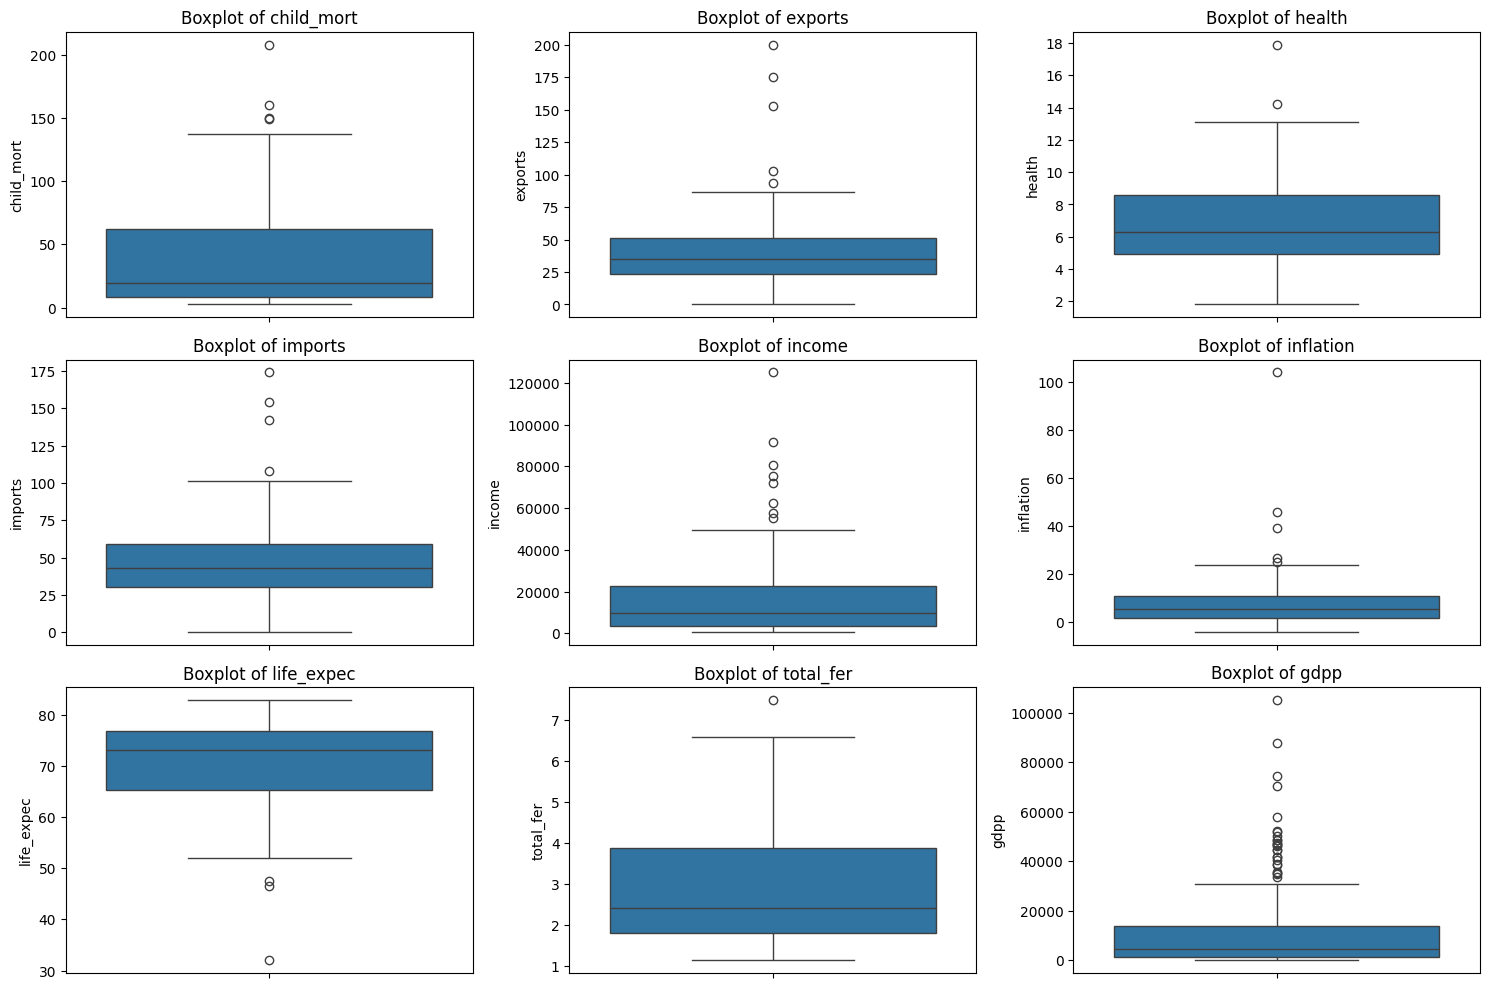

In [3]:
plt.figure(figsize=(15, 10))
numeric_cols = data.select_dtypes(include=[np.number]).columns

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 3, i)
    plt.hist(data[col], bins=20, alpha=0.7)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 8))
correlation_matrix = data[numeric_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Features')
plt.show()

plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=data[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()


In [4]:
data_clean = data.copy()

Q1 = data_clean[numeric_cols].quantile(0.25)
Q3 = data_clean[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

outlier_condition = ~((data_clean[numeric_cols] < (Q1 - 1.5 * IQR)) | 
                     (data_clean[numeric_cols] > (Q3 + 1.5 * IQR))).any(axis=1)
data_clean = data_clean[outlier_condition]

print(f"Original dataset size: {data.shape[0]}")
print(f"After outlier removal: {data_clean.shape[0]}")
print(f"Outliers removed: {data.shape[0] - data_clean.shape[0]}")

features = data_clean.drop('country', axis=1)
countries = data_clean['country']

scaler_standard = StandardScaler()
features_scaled_std = scaler_standard.fit_transform(features)

scaler_minmax = MinMaxScaler()
features_scaled_mm = scaler_minmax.fit_transform(features)

features_scaled_std_df = pd.DataFrame(features_scaled_std, columns=features.columns)
features_scaled_mm_df = pd.DataFrame(features_scaled_mm, columns=features.columns)

print("Scaling completed - both StandardScaler and MinMaxScaler")


Original dataset size: 167
After outlier removal: 128
Outliers removed: 39
Scaling completed - both StandardScaler and MinMaxScaler


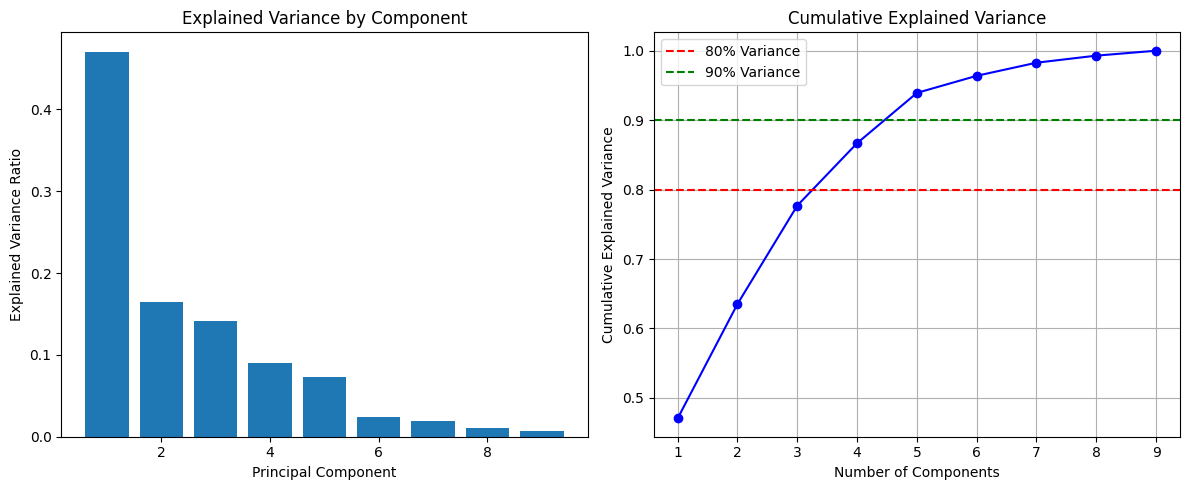

Components needed for 80% variance: 4
Components needed for 90% variance: 5
PCA transformation completed with 4 components


In [5]:
pca_full = PCA()
pca_full.fit(features_scaled_std)

explained_variance_ratio = pca_full.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance by Component')

plt.subplot(1, 2, 2)
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, 'bo-')
plt.axhline(y=0.8, color='r', linestyle='--', label='80% Variance')
plt.axhline(y=0.9, color='g', linestyle='--', label='90% Variance')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

n_components_80 = np.argmax(cumulative_variance >= 0.8) + 1
n_components_90 = np.argmax(cumulative_variance >= 0.9) + 1

print(f"Components needed for 80% variance: {n_components_80}")
print(f"Components needed for 90% variance: {n_components_90}")

pca_reduced = PCA(n_components=n_components_80)
features_pca = pca_reduced.fit_transform(features_scaled_std)
features_pca_df = pd.DataFrame(features_pca, columns=[f'PC{i+1}' for i in range(n_components_80)])

print(f"PCA transformation completed with {n_components_80} components")


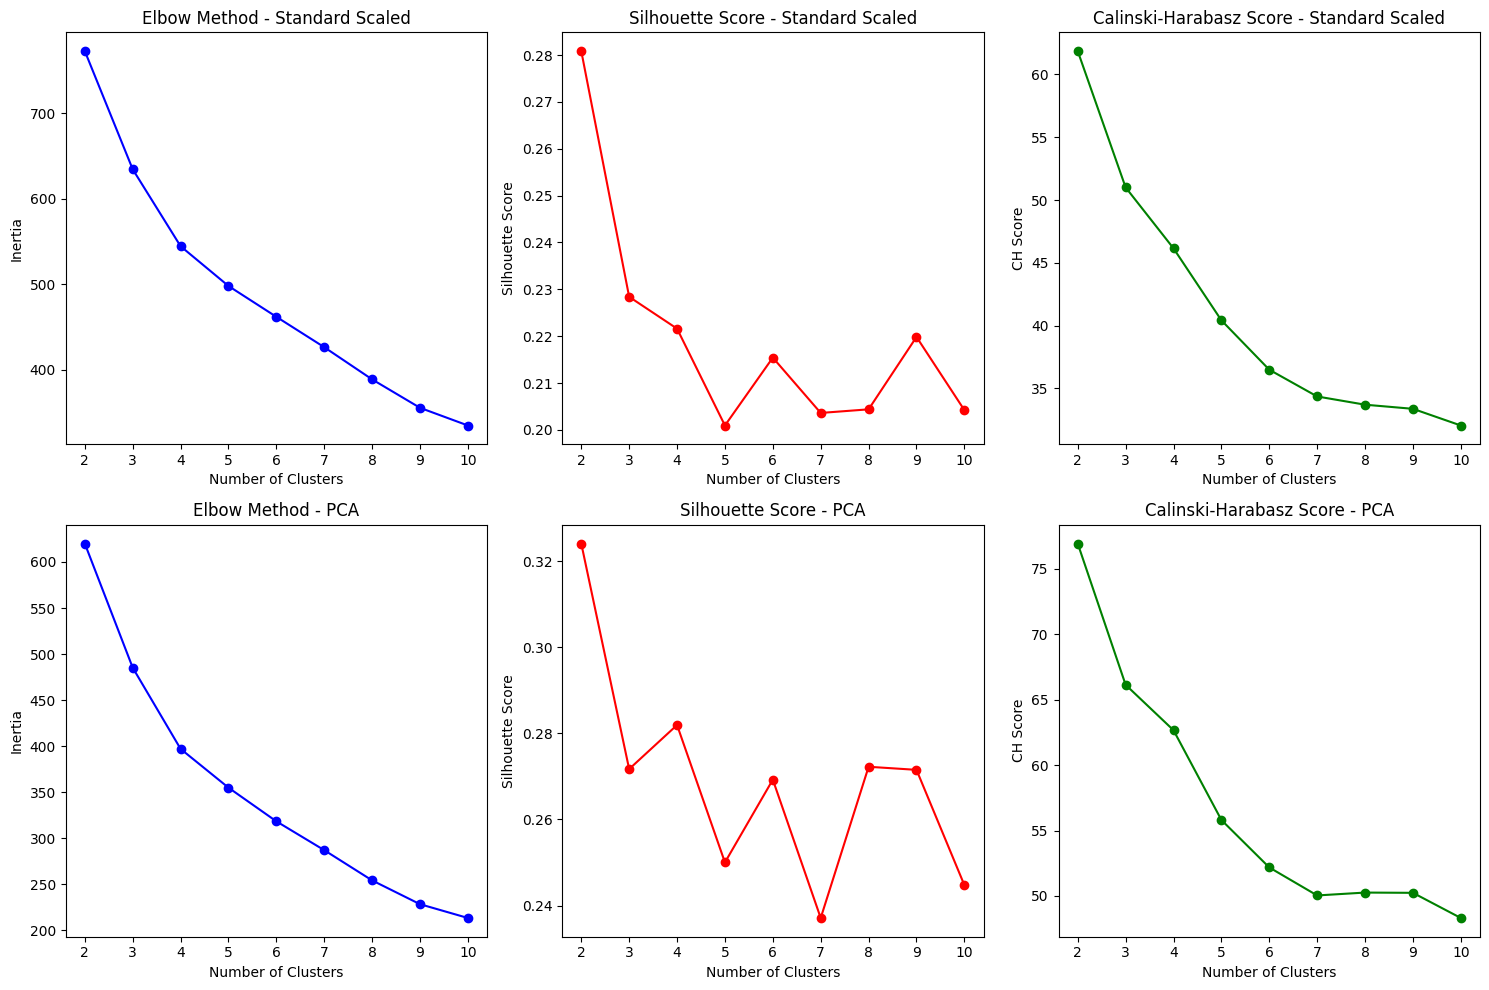

Optimal K for Standard Scaled data: 2
Optimal K for PCA data: 2


In [6]:
def evaluate_kmeans(data, max_clusters=10):
    inertias = []
    silhouette_scores = []
    calinski_scores = []
    davies_bouldin_scores = []
    
    for k in range(2, max_clusters + 1):
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        cluster_labels = kmeans.fit_predict(data)
        
        inertias.append(kmeans.inertia_)
        silhouette_scores.append(silhouette_score(data, cluster_labels))
        calinski_scores.append(calinski_harabasz_score(data, cluster_labels))
        davies_bouldin_scores.append(davies_bouldin_score(data, cluster_labels))
    
    return inertias, silhouette_scores, calinski_scores, davies_bouldin_scores

inertias_std, sil_std, cal_std, db_std = evaluate_kmeans(features_scaled_std)
inertias_pca, sil_pca, cal_pca, db_pca = evaluate_kmeans(features_pca)

plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
plt.plot(range(2, 11), inertias_std, 'bo-')
plt.title('Elbow Method - Standard Scaled')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')

plt.subplot(2, 3, 2)
plt.plot(range(2, 11), sil_std, 'ro-')
plt.title('Silhouette Score - Standard Scaled')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')

plt.subplot(2, 3, 3)
plt.plot(range(2, 11), cal_std, 'go-')
plt.title('Calinski-Harabasz Score - Standard Scaled')
plt.xlabel('Number of Clusters')
plt.ylabel('CH Score')

plt.subplot(2, 3, 4)
plt.plot(range(2, 11), inertias_pca, 'bo-')
plt.title('Elbow Method - PCA')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')

plt.subplot(2, 3, 5)
plt.plot(range(2, 11), sil_pca, 'ro-')
plt.title('Silhouette Score - PCA')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')

plt.subplot(2, 3, 6)
plt.plot(range(2, 11), cal_pca, 'go-')
plt.title('Calinski-Harabasz Score - PCA')
plt.xlabel('Number of Clusters')
plt.ylabel('CH Score')

plt.tight_layout()
plt.show()

optimal_k_std = np.argmax(sil_std) + 2
optimal_k_pca = np.argmax(sil_pca) + 2

print(f"Optimal K for Standard Scaled data: {optimal_k_std}")
print(f"Optimal K for PCA data: {optimal_k_pca}")

kmeans_final_std = KMeans(n_clusters=optimal_k_std, random_state=42, n_init=10)
kmeans_labels_std = kmeans_final_std.fit_predict(features_scaled_std)

kmeans_final_pca = KMeans(n_clusters=optimal_k_pca, random_state=42, n_init=10)
kmeans_labels_pca = kmeans_final_pca.fit_predict(features_pca)


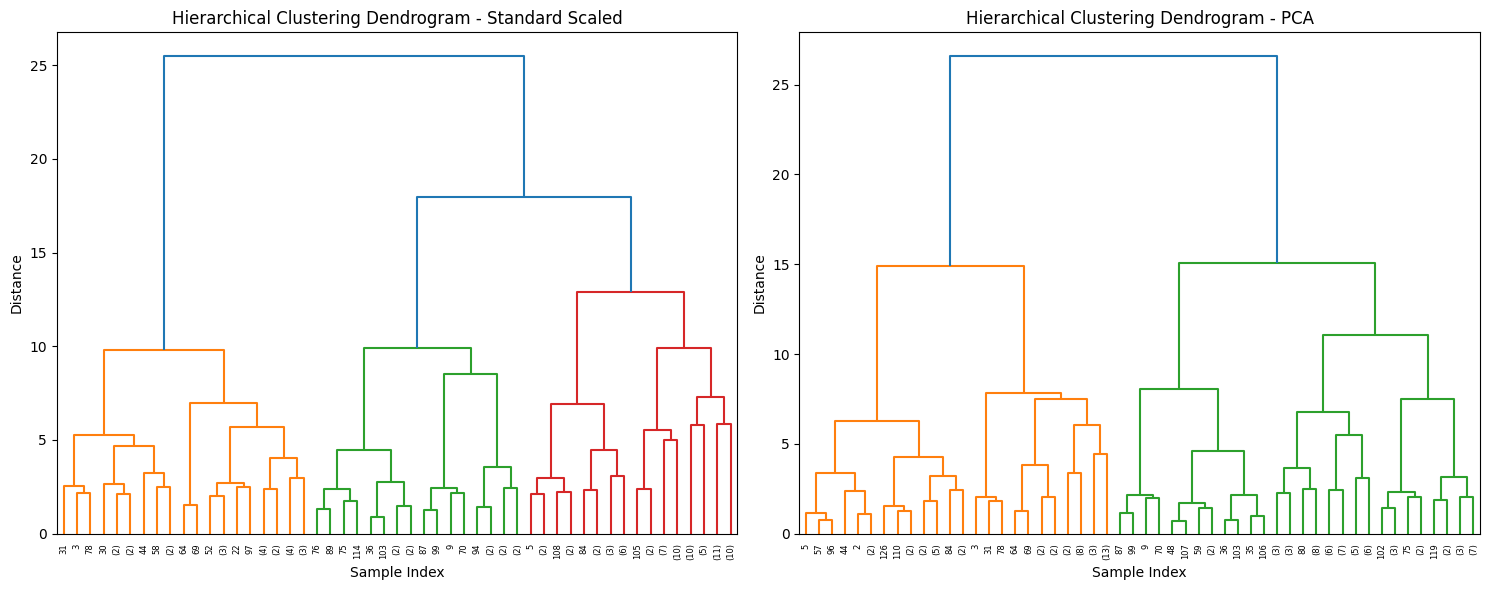

Optimal K for Hierarchical (Standard): 2
Optimal K for Hierarchical (PCA): 2


In [7]:
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
linkage_matrix_std = linkage(features_scaled_std, method='ward')
dendrogram(linkage_matrix_std, truncate_mode='level', p=5)
plt.title('Hierarchical Clustering Dendrogram - Standard Scaled')
plt.xlabel('Sample Index')
plt.ylabel('Distance')

plt.subplot(1, 2, 2)
linkage_matrix_pca = linkage(features_pca, method='ward')
dendrogram(linkage_matrix_pca, truncate_mode='level', p=5)
plt.title('Hierarchical Clustering Dendrogram - PCA')
plt.xlabel('Sample Index')
plt.ylabel('Distance')

plt.tight_layout()
plt.show()

def evaluate_hierarchical(data, max_clusters=10):
    silhouette_scores = []
    calinski_scores = []
    davies_bouldin_scores = []
    
    for k in range(2, max_clusters + 1):
        hierarchical = AgglomerativeClustering(n_clusters=k, linkage='ward')
        cluster_labels = hierarchical.fit_predict(data)
        
        silhouette_scores.append(silhouette_score(data, cluster_labels))
        calinski_scores.append(calinski_harabasz_score(data, cluster_labels))
        davies_bouldin_scores.append(davies_bouldin_score(data, cluster_labels))
    
    return silhouette_scores, calinski_scores, davies_bouldin_scores

hier_sil_std, hier_cal_std, hier_db_std = evaluate_hierarchical(features_scaled_std)
hier_sil_pca, hier_cal_pca, hier_db_pca = evaluate_hierarchical(features_pca)

optimal_k_hier_std = np.argmax(hier_sil_std) + 2
optimal_k_hier_pca = np.argmax(hier_sil_pca) + 2

hierarchical_final_std = AgglomerativeClustering(n_clusters=optimal_k_hier_std, linkage='ward')
hierarchical_labels_std = hierarchical_final_std.fit_predict(features_scaled_std)

hierarchical_final_pca = AgglomerativeClustering(n_clusters=optimal_k_hier_pca, linkage='ward')
hierarchical_labels_pca = hierarchical_final_pca.fit_predict(features_pca)

print(f"Optimal K for Hierarchical (Standard): {optimal_k_hier_std}")
print(f"Optimal K for Hierarchical (PCA): {optimal_k_hier_pca}")


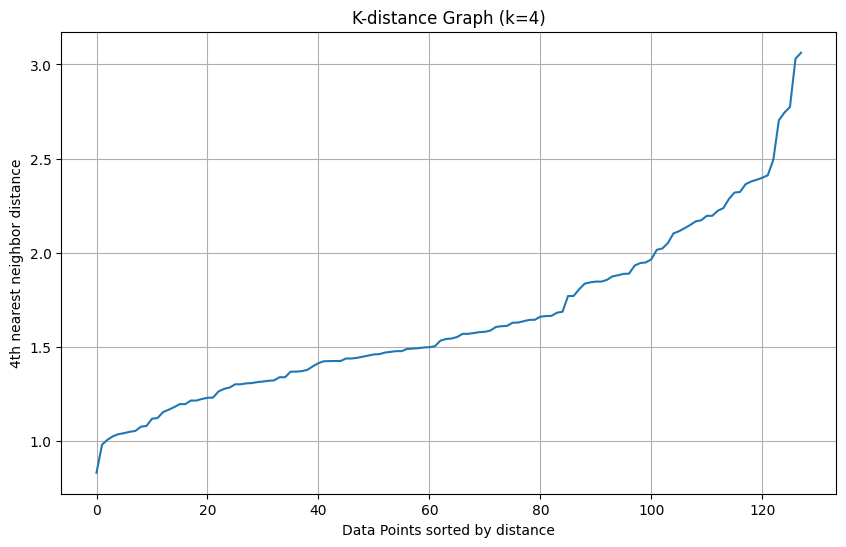

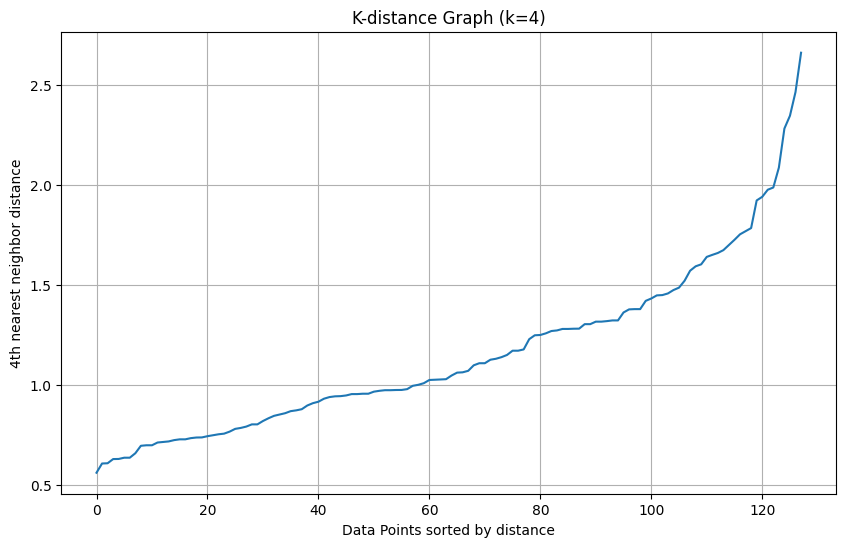

Best DBSCAN parameters for Standard Scaled: eps=1.7, min_samples=5
Best silhouette score: 0.169
Best DBSCAN parameters for PCA: eps=1.5, min_samples=3
Best silhouette score: 0.177


In [8]:
from sklearn.neighbors import NearestNeighbors

def find_optimal_eps(data, k=4):
    neighbors = NearestNeighbors(n_neighbors=k)
    neighbors_fit = neighbors.fit(data)
    distances, indices = neighbors_fit.kneighbors(data)
    distances = np.sort(distances, axis=0)
    distances = distances[:, k-1]
    
    plt.figure(figsize=(10, 6))
    plt.plot(distances)
    plt.title(f'K-distance Graph (k={k})')
    plt.xlabel('Data Points sorted by distance')
    plt.ylabel(f'{k}th nearest neighbor distance')
    plt.grid(True)
    plt.show()
    
    return distances

distances_std = find_optimal_eps(features_scaled_std)
distances_pca = find_optimal_eps(features_pca)

def evaluate_dbscan(data, eps_values, min_samples_values):
    best_score = -1
    best_params = None
    results = []
    
    for eps in eps_values:
        for min_samples in min_samples_values:
            dbscan = DBSCAN(eps=eps, min_samples=min_samples)
            cluster_labels = dbscan.fit_predict(data)
            
            n_clusters = len(set(cluster_labels)) - (1 if -1 in cluster_labels else 0)
            n_noise = list(cluster_labels).count(-1)
            
            if n_clusters > 1:
                score = silhouette_score(data, cluster_labels)
                results.append({
                    'eps': eps,
                    'min_samples': min_samples,
                    'n_clusters': n_clusters,
                    'n_noise': n_noise,
                    'silhouette_score': score
                })
                
                if score > best_score:
                    best_score = score
                    best_params = (eps, min_samples)
    
    return results, best_params, best_score

eps_values = np.arange(0.3, 2.0, 0.1)
min_samples_values = range(3, 10)

results_std, best_params_std, best_score_std = evaluate_dbscan(features_scaled_std, eps_values, min_samples_values)
results_pca, best_params_pca, best_score_pca = evaluate_dbscan(features_pca, eps_values, min_samples_values)

print(f"Best DBSCAN parameters for Standard Scaled: eps={best_params_std[0]:.1f}, min_samples={best_params_std[1]}")
print(f"Best silhouette score: {best_score_std:.3f}")

print(f"Best DBSCAN parameters for PCA: eps={best_params_pca[0]:.1f}, min_samples={best_params_pca[1]}")
print(f"Best silhouette score: {best_score_pca:.3f}")

dbscan_final_std = DBSCAN(eps=best_params_std[0], min_samples=best_params_std[1])
dbscan_labels_std = dbscan_final_std.fit_predict(features_scaled_std)

dbscan_final_pca = DBSCAN(eps=best_params_pca[0], min_samples=best_params_pca[1])
dbscan_labels_pca = dbscan_final_pca.fit_predict(features_pca)


Model Comparison:
                Model  Silhouette Score  N_Clusters
0       K-Means (Std)          0.280849           2
1       K-Means (PCA)          0.324057           2
2  Hierarchical (Std)          0.281348           2
3  Hierarchical (PCA)          0.308966           2
4        DBSCAN (Std)          0.169354           2
5        DBSCAN (PCA)          0.177471           2

Best performing model: K-Means (PCA)
Silhouette Score: 0.324
Number of Clusters: 2

Cluster Summary Statistics:
        child_mort            gdpp          life_expec          income  \
              mean    std     mean      std       mean   std      mean   
cluster                                                                  
0            70.20  29.55  1727.07  1798.20      62.79  5.46   3917.98   
1            15.89  10.55  9855.27  7625.07      74.74  3.57  16427.16   

                 health        
             std   mean   std  
cluster                        
0        3478.74   5.80  2.38  
1     

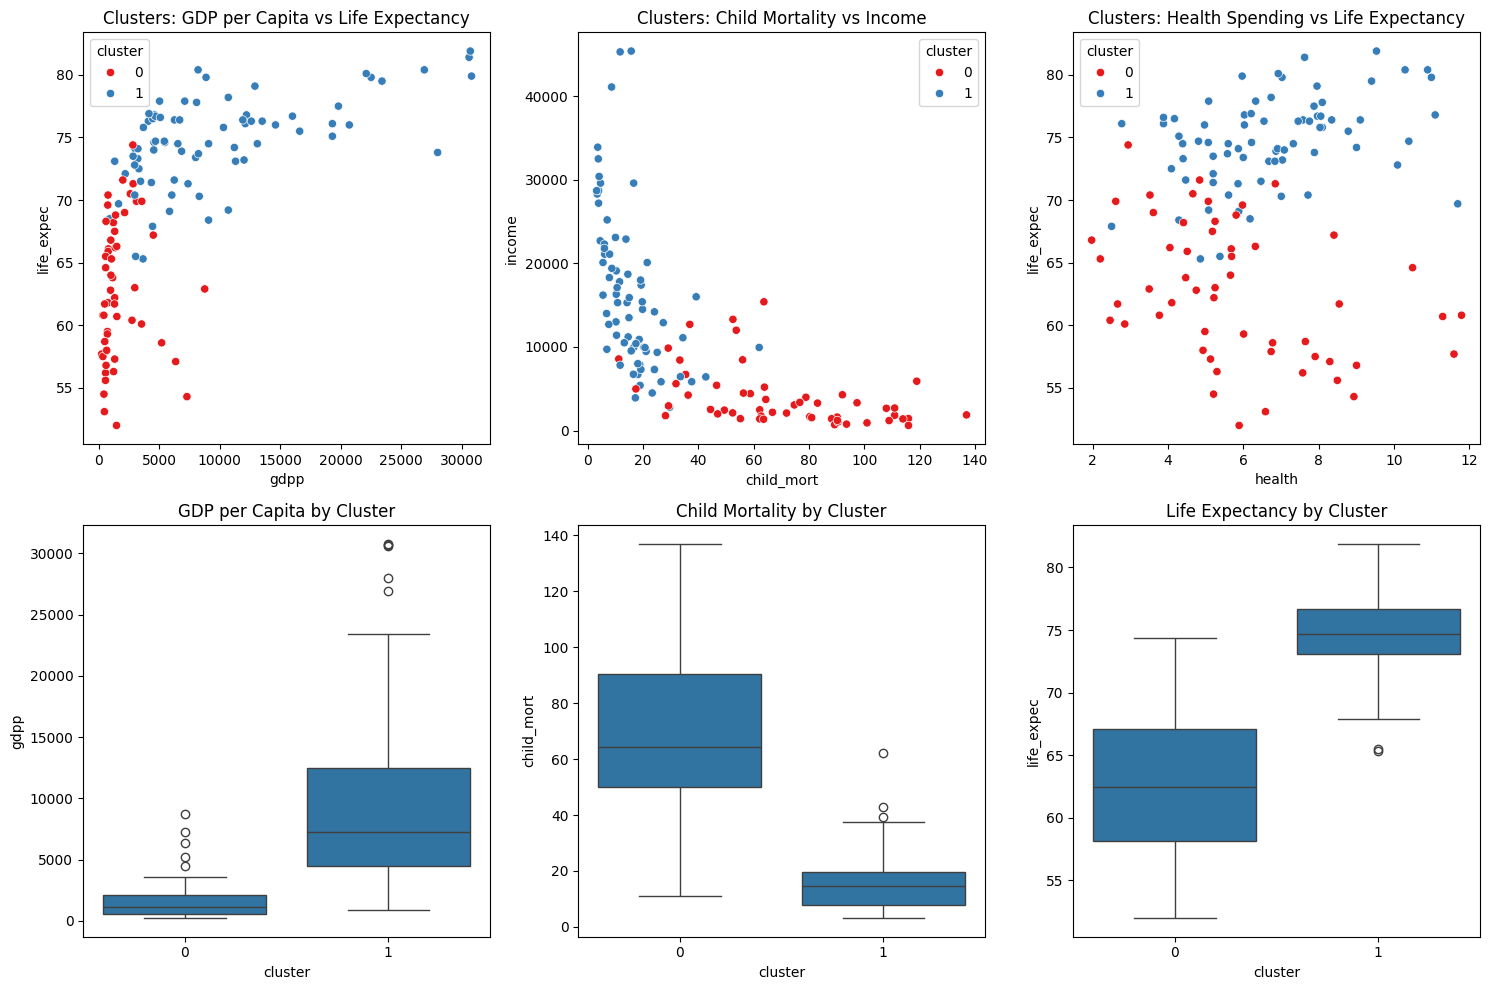


Cluster 0 Countries:
Afghanistan, Angola, Bangladesh, Benin, Bolivia, Botswana, Burkina Faso, Burundi, Cambodia, Cameroon, Comoros, Congo, Dem. Rep., Congo, Rep., Cote d'Ivoire, Egypt, Eritrea, Gabon, Gambia, Ghana, Guatemala, Guinea, Guinea-Bissau, India, Indonesia, Iraq, Kenya, Kiribati, Lao, Liberia, Madagascar, Malawi, Mali, Mauritania, Mozambique, Myanmar, Namibia, Nepal, Pakistan, Philippines, Rwanda, Senegal, Solomon Islands, South Africa, Sri Lanka, Sudan, Tajikistan, Tanzania, Togo, Tonga, Uganda, Uzbekistan, Vanuatu, Yemen, Zambia

Cluster 1 Countries:
Albania, Algeria, Antigua and Barbuda, Argentina, Armenia, Azerbaijan, Bahamas, Bahrain, Barbados, Belarus, Belize, Bhutan, Bosnia and Herzegovina, Brazil, Bulgaria, Cape Verde, Chile, China, Colombia, Costa Rica, Croatia, Cyprus, Czech Republic, Dominican Republic, Ecuador, El Salvador, Estonia, Fiji, Georgia, Greece, Grenada, Guyana, Hungary, Iran, Israel, Jamaica, Jordan, Kazakhstan, Kyrgyz Republic, Latvia, Lebanon, Libya,

In [9]:
results_df = pd.DataFrame({
    'Model': ['K-Means (Std)', 'K-Means (PCA)', 'Hierarchical (Std)', 'Hierarchical (PCA)', 'DBSCAN (Std)', 'DBSCAN (PCA)'],
    'Silhouette Score': [
        silhouette_score(features_scaled_std, kmeans_labels_std),
        silhouette_score(features_pca, kmeans_labels_pca),
        silhouette_score(features_scaled_std, hierarchical_labels_std),
        silhouette_score(features_pca, hierarchical_labels_pca),
        silhouette_score(features_scaled_std, dbscan_labels_std),
        silhouette_score(features_pca, dbscan_labels_pca)
    ],
    'N_Clusters': [
        optimal_k_std,
        optimal_k_pca,
        optimal_k_hier_std,
        optimal_k_hier_pca,
        len(set(dbscan_labels_std)) - (1 if -1 in dbscan_labels_std else 0),
        len(set(dbscan_labels_pca)) - (1 if -1 in dbscan_labels_pca else 0)
    ]
})

print("Model Comparison:")
print(results_df)

best_model_idx = results_df['Silhouette Score'].idxmax()
best_model = results_df.iloc[best_model_idx]
print(f"\nBest performing model: {best_model['Model']}")
print(f"Silhouette Score: {best_model['Silhouette Score']:.3f}")
print(f"Number of Clusters: {best_model['N_Clusters']}")

data_clean['cluster'] = kmeans_labels_std
cluster_summary = data_clean.groupby('cluster').agg({
    'child_mort': ['mean', 'std'],
    'gdpp': ['mean', 'std'],
    'life_expec': ['mean', 'std'],
    'income': ['mean', 'std'],
    'health': ['mean', 'std']
}).round(2)

print("\nCluster Summary Statistics:")
print(cluster_summary)

plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
sns.scatterplot(data=data_clean, x='gdpp', y='life_expec', hue='cluster', palette='Set1')
plt.title('Clusters: GDP per Capita vs Life Expectancy')

plt.subplot(2, 3, 2)
sns.scatterplot(data=data_clean, x='child_mort', y='income', hue='cluster', palette='Set1')
plt.title('Clusters: Child Mortality vs Income')

plt.subplot(2, 3, 3)
sns.scatterplot(data=data_clean, x='health', y='life_expec', hue='cluster', palette='Set1')
plt.title('Clusters: Health Spending vs Life Expectancy')

plt.subplot(2, 3, 4)
sns.boxplot(data=data_clean, x='cluster', y='gdpp')
plt.title('GDP per Capita by Cluster')

plt.subplot(2, 3, 5)
sns.boxplot(data=data_clean, x='cluster', y='child_mort')
plt.title('Child Mortality by Cluster')

plt.subplot(2, 3, 6)
sns.boxplot(data=data_clean, x='cluster', y='life_expec')
plt.title('Life Expectancy by Cluster')

plt.tight_layout()
plt.show()

for cluster in sorted(data_clean['cluster'].unique()):
    print(f"\nCluster {cluster} Countries:")
    cluster_countries = data_clean[data_clean['cluster'] == cluster]['country'].tolist()
    print(', '.join(cluster_countries))


Feature Importance in Principal Components:
      Feature       PC1       PC2       PC3
0  child_mort  0.439039  0.062814  0.019803
6  life_expec  0.426332  0.151861  0.044908
7   total_fer  0.421464  0.077935  0.036468
4      income  0.408368  0.223794  0.136174
8        gdpp  0.397197  0.164698  0.049644
1     exports  0.230030  0.340590  0.622078
5   inflation  0.199594  0.382842  0.416567
2      health  0.125979  0.307398  0.611685
3     imports  0.121249  0.729826  0.201459


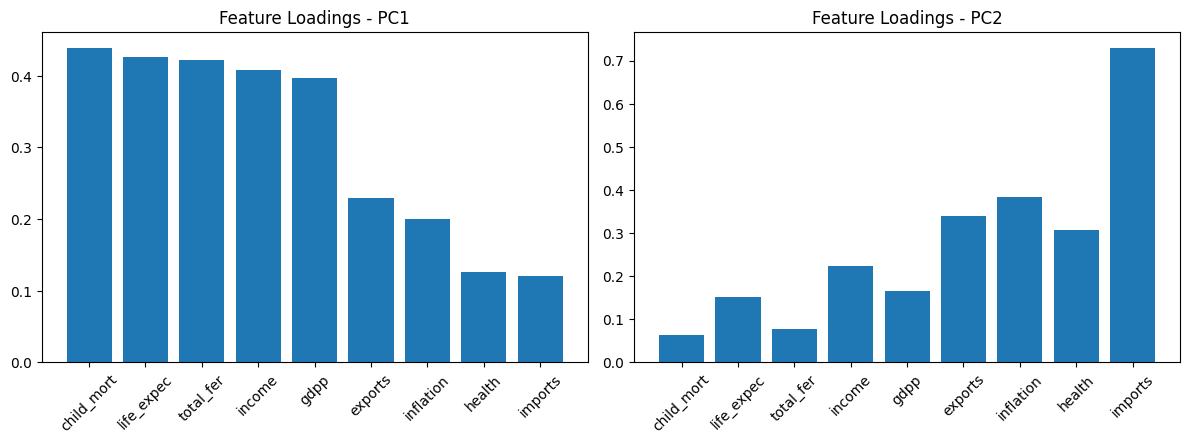

Final clustering results saved!
Total countries clustered: 128
Number of clusters: 2


In [10]:
feature_importance = pd.DataFrame({
    'Feature': features.columns,
    'PC1': np.abs(pca_reduced.components_[0]),
    'PC2': np.abs(pca_reduced.components_[1]) if n_components_80 > 1 else 0,
    'PC3': np.abs(pca_reduced.components_[2]) if n_components_80 > 2 else 0
})

feature_importance = feature_importance.sort_values('PC1', ascending=False)
print("Feature Importance in Principal Components:")
print(feature_importance)

plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.bar(feature_importance['Feature'], feature_importance['PC1'])
plt.title('Feature Loadings - PC1')
plt.xticks(rotation=45)

if n_components_80 > 1:
    plt.subplot(2, 2, 2)
    plt.bar(feature_importance['Feature'], feature_importance['PC2'])
    plt.title('Feature Loadings - PC2')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

final_results = data_clean[['country', 'cluster']].copy()
final_results = final_results.merge(data_clean[['country'] + list(features.columns)], on='country')

print("Final clustering results saved!")
print(f"Total countries clustered: {len(final_results)}")
print(f"Number of clusters: {len(final_results['cluster'].unique())}")


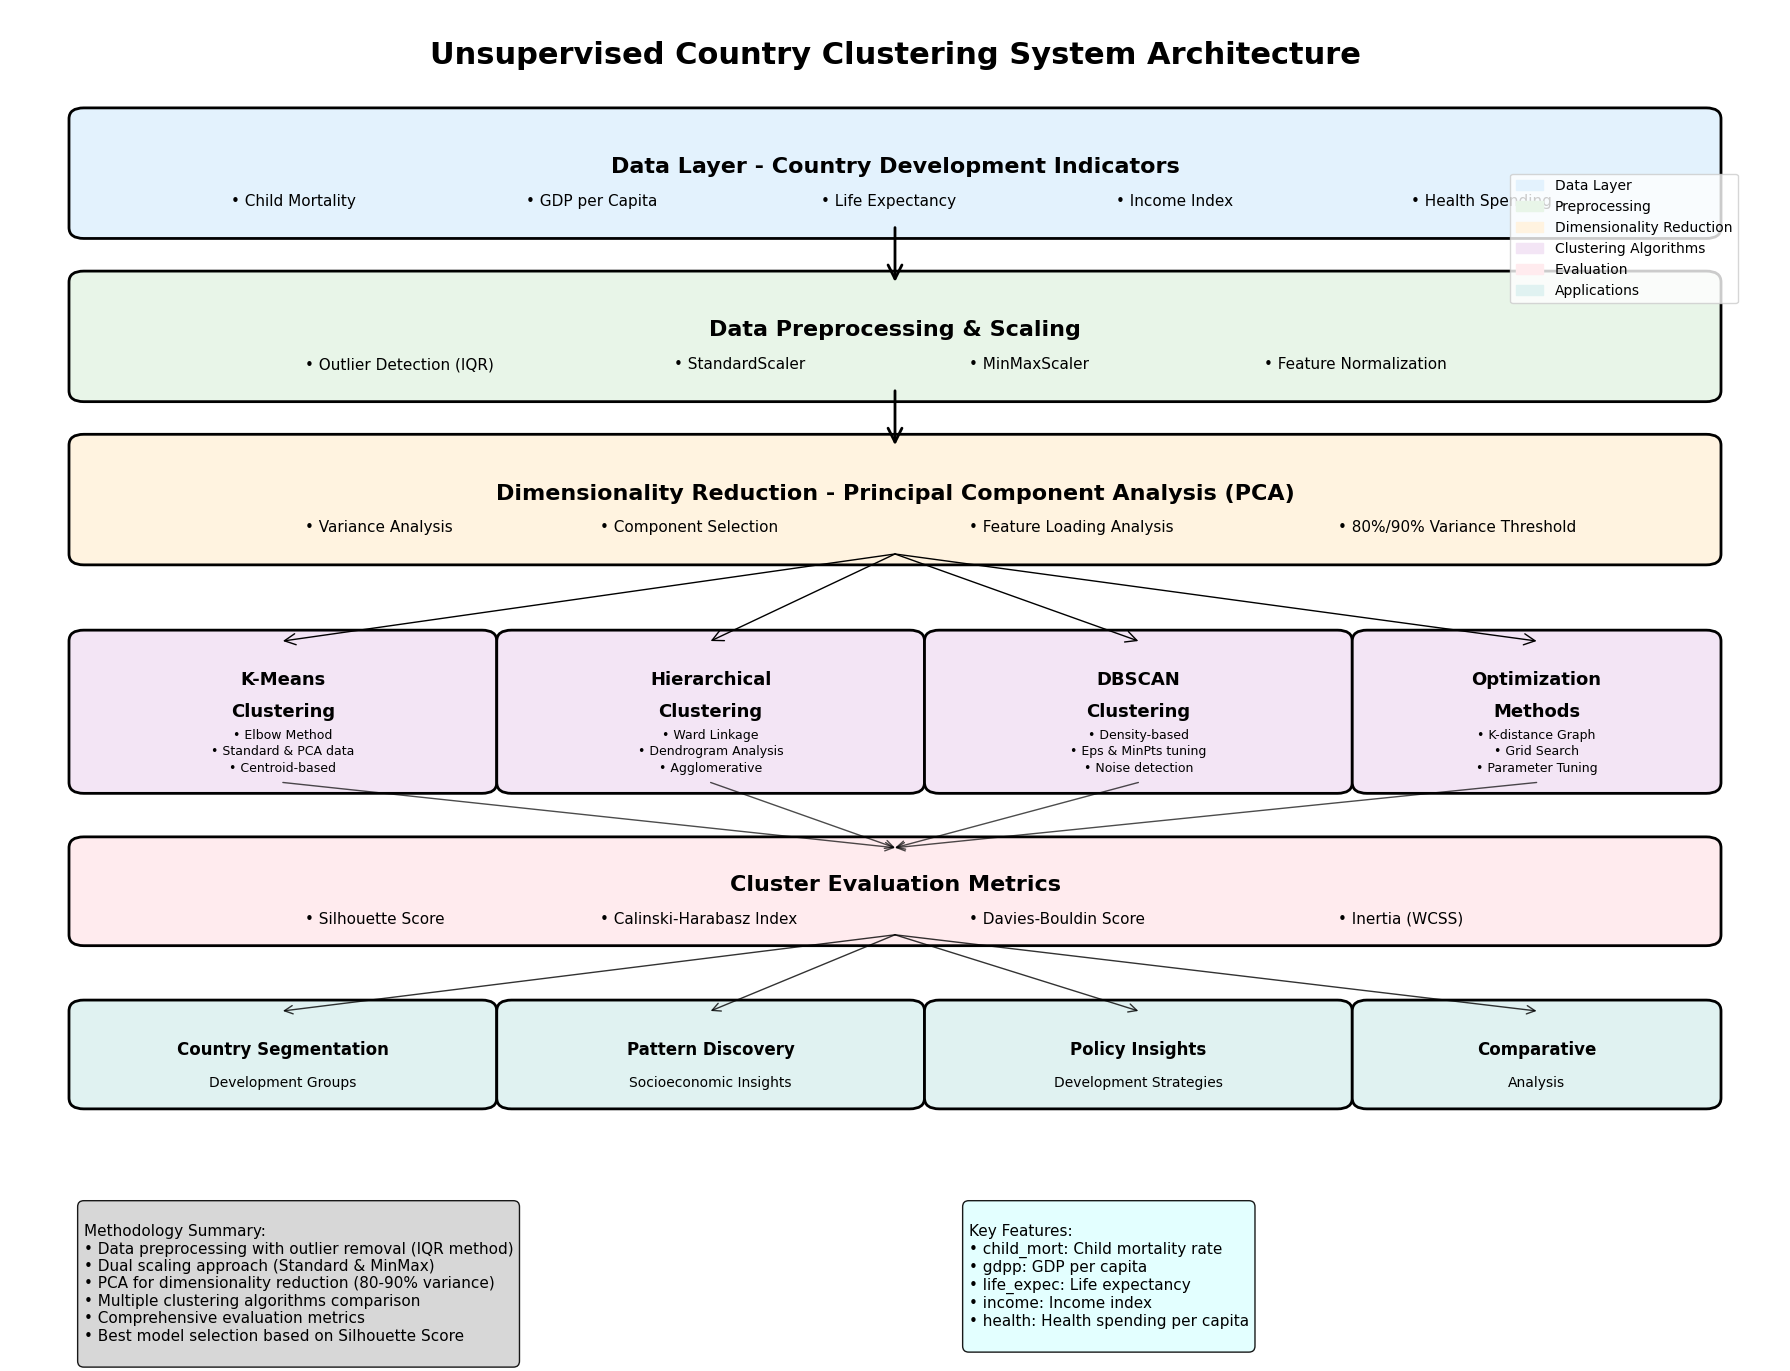

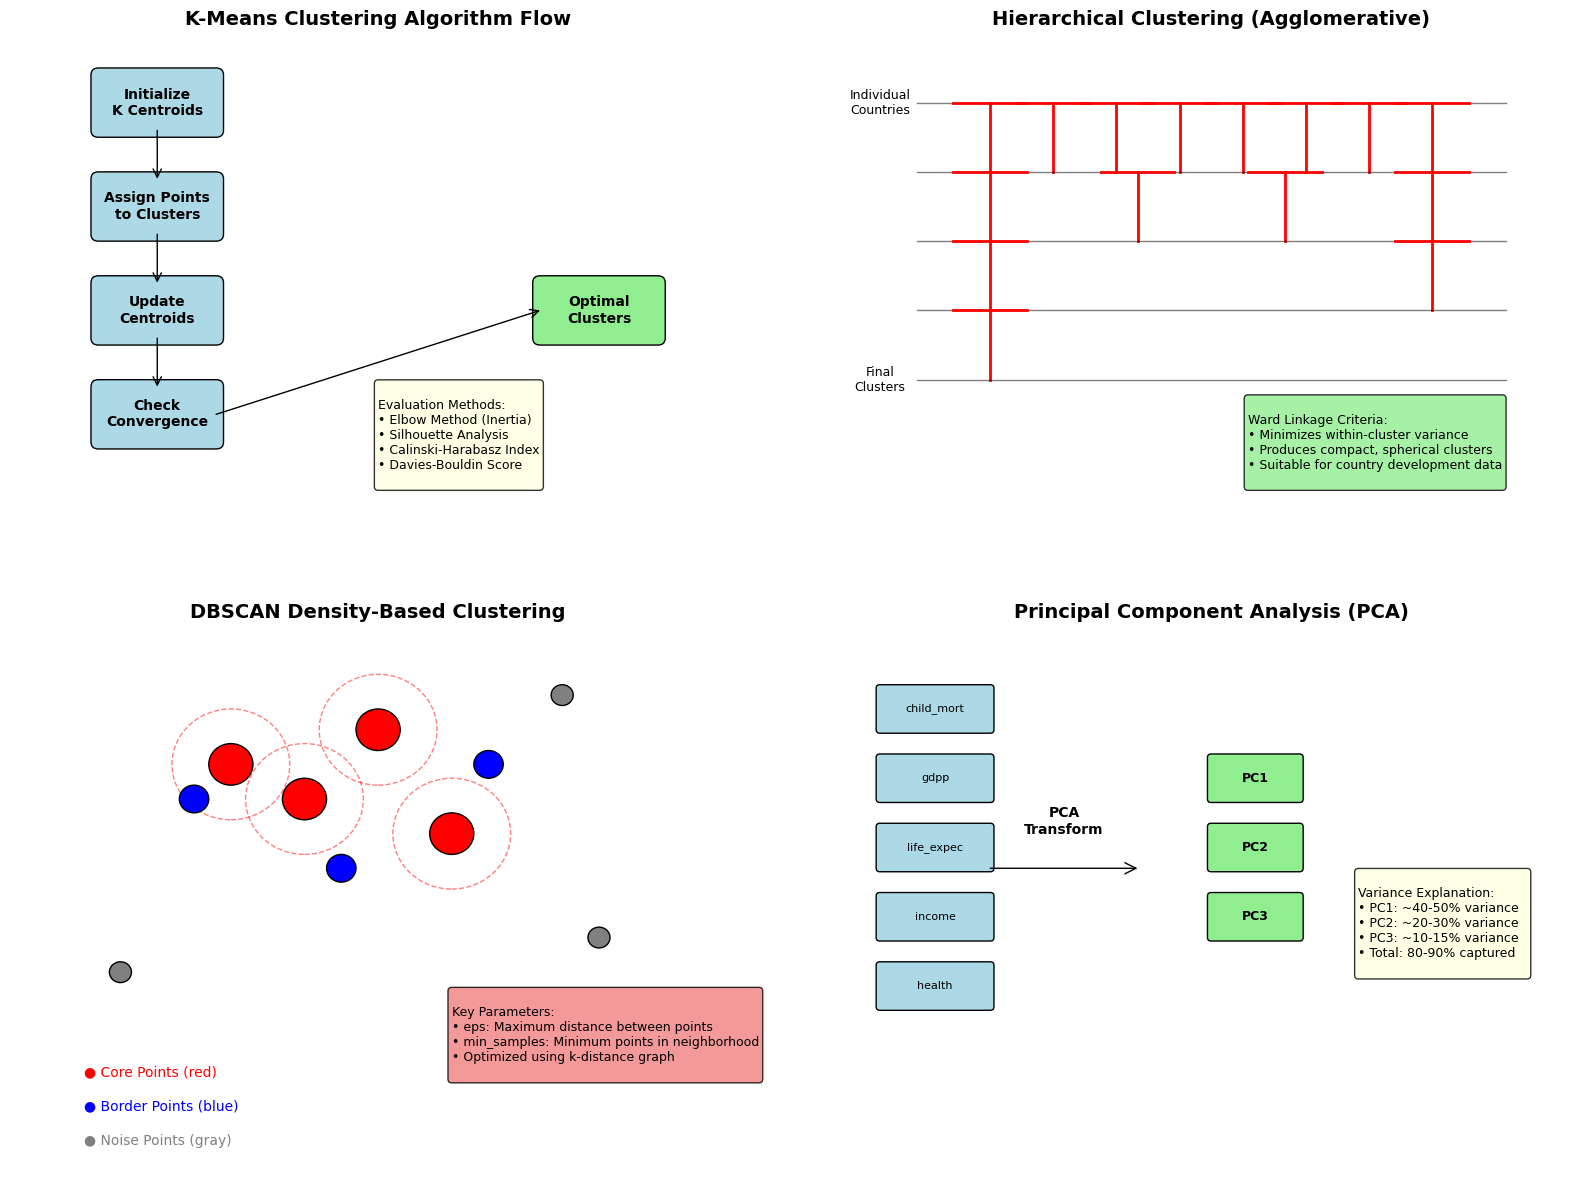

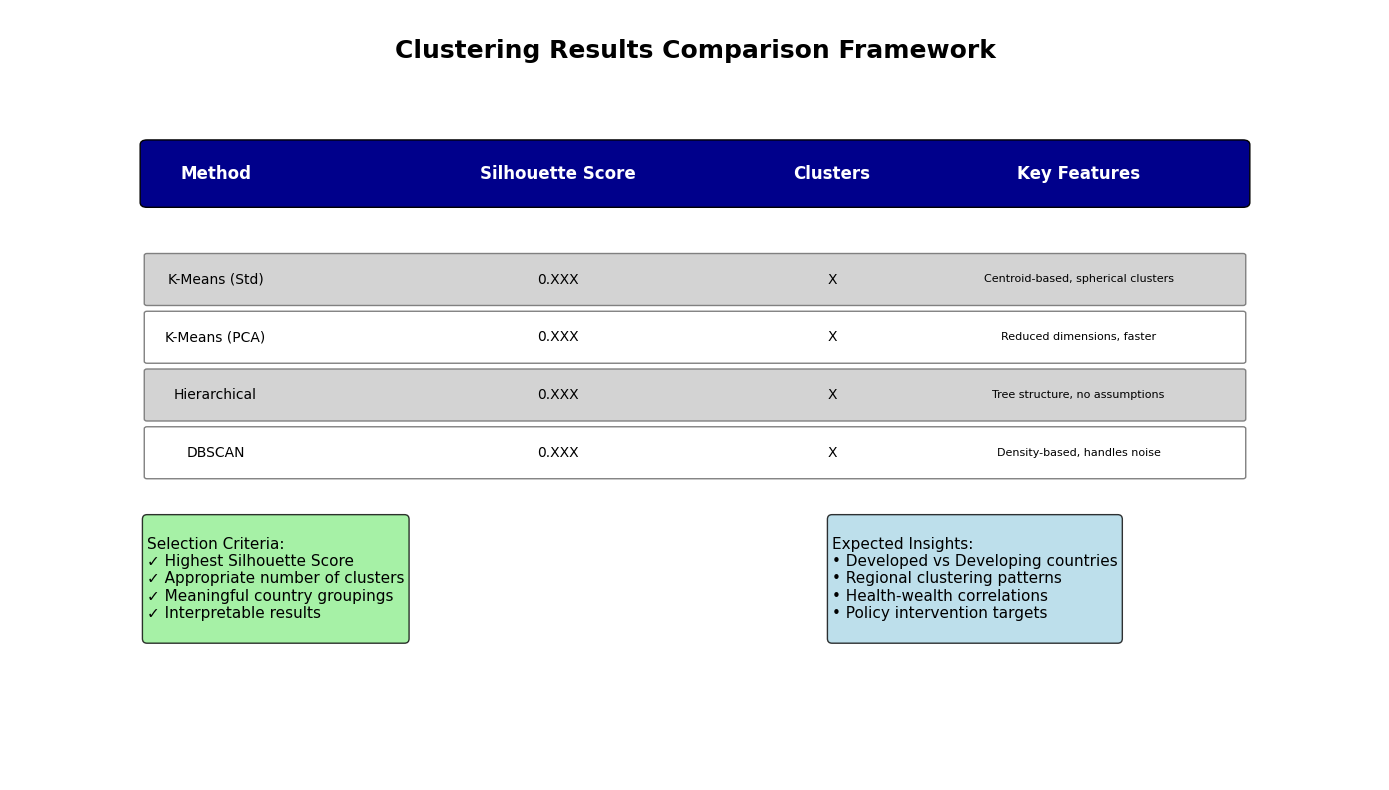

In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.patches import FancyBboxPatch, ConnectionPatch, Circle, Ellipse
import numpy as np

# Create the comprehensive unsupervised learning system architecture
fig, ax = plt.subplots(figsize=(18, 14))
ax.set_xlim(0, 12)
ax.set_ylim(0, 12)
ax.axis('off')

# Define colors for different components
colors = {
    'data': '#E3F2FD',           # Light blue
    'preprocessing': '#E8F5E8',   # Light green
    'dimred': '#FFF3E0',         # Light orange
    'clustering': '#F3E5F5',     # Light purple
    'evaluation': '#FFEBEE',     # Light pink
    'output': '#E0F2F1'          # Light teal
}

# Title
ax.text(6, 11.5, 'Unsupervised Country Clustering System Architecture', 
        fontsize=22, fontweight='bold', ha='center')

# Data Layer
data_box = FancyBboxPatch((0.5, 10), 11, 1, 
                         boxstyle="round,pad=0.1", 
                         facecolor=colors['data'], 
                         edgecolor='black', linewidth=2)
ax.add_patch(data_box)
ax.text(6, 10.5, 'Data Layer - Country Development Indicators', fontsize=16, fontweight='bold', ha='center')
ax.text(1.5, 10.2, '• Child Mortality', fontsize=11, ha='left')
ax.text(3.5, 10.2, '• GDP per Capita', fontsize=11, ha='left')
ax.text(5.5, 10.2, '• Life Expectancy', fontsize=11, ha='left')
ax.text(7.5, 10.2, '• Income Index', fontsize=11, ha='left')
ax.text(9.5, 10.2, '• Health Spending', fontsize=11, ha='left')

# Preprocessing Layer
prep_box = FancyBboxPatch((0.5, 8.5), 11, 1, 
                         boxstyle="round,pad=0.1", 
                         facecolor=colors['preprocessing'], 
                         edgecolor='black', linewidth=2)
ax.add_patch(prep_box)
ax.text(6, 9, 'Data Preprocessing & Scaling', fontsize=16, fontweight='bold', ha='center')
ax.text(2, 8.7, '• Outlier Detection (IQR)', fontsize=11, ha='left')
ax.text(4.5, 8.7, '• StandardScaler', fontsize=11, ha='left')
ax.text(6.5, 8.7, '• MinMaxScaler', fontsize=11, ha='left')
ax.text(8.5, 8.7, '• Feature Normalization', fontsize=11, ha='left')

# Dimensionality Reduction
dimred_box = FancyBboxPatch((0.5, 7), 11, 1, 
                           boxstyle="round,pad=0.1", 
                           facecolor=colors['dimred'], 
                           edgecolor='black', linewidth=2)
ax.add_patch(dimred_box)
ax.text(6, 7.5, 'Dimensionality Reduction - Principal Component Analysis (PCA)', fontsize=16, fontweight='bold', ha='center')
ax.text(2, 7.2, '• Variance Analysis', fontsize=11, ha='left')
ax.text(4, 7.2, '• Component Selection', fontsize=11, ha='left')
ax.text(6.5, 7.2, '• Feature Loading Analysis', fontsize=11, ha='left')
ax.text(9, 7.2, '• 80%/90% Variance Threshold', fontsize=11, ha='left')

# Clustering Algorithms Row
cluster_y = 5.5
cluster_height = 1.3

# K-Means Clustering
kmeans_box = FancyBboxPatch((0.5, cluster_y-0.6), 2.7, cluster_height, 
                           boxstyle="round,pad=0.1", 
                           facecolor=colors['clustering'], 
                           edgecolor='black', linewidth=2)
ax.add_patch(kmeans_box)
ax.text(1.85, cluster_y+0.3, 'K-Means', fontsize=13, fontweight='bold', ha='center')
ax.text(1.85, cluster_y, 'Clustering', fontsize=13, fontweight='bold', ha='center')
ax.text(1.85, cluster_y-0.2, '• Elbow Method', fontsize=9, ha='center')
ax.text(1.85, cluster_y-0.35, '• Standard & PCA data', fontsize=9, ha='center')
ax.text(1.85, cluster_y-0.5, '• Centroid-based', fontsize=9, ha='center')

# Hierarchical Clustering
hier_box = FancyBboxPatch((3.4, cluster_y-0.6), 2.7, cluster_height, 
                         boxstyle="round,pad=0.1", 
                         facecolor=colors['clustering'], 
                         edgecolor='black', linewidth=2)
ax.add_patch(hier_box)
ax.text(4.75, cluster_y+0.3, 'Hierarchical', fontsize=13, fontweight='bold', ha='center')
ax.text(4.75, cluster_y, 'Clustering', fontsize=13, fontweight='bold', ha='center')
ax.text(4.75, cluster_y-0.2, '• Ward Linkage', fontsize=9, ha='center')
ax.text(4.75, cluster_y-0.35, '• Dendrogram Analysis', fontsize=9, ha='center')
ax.text(4.75, cluster_y-0.5, '• Agglomerative', fontsize=9, ha='center')

# DBSCAN Clustering
dbscan_box = FancyBboxPatch((6.3, cluster_y-0.6), 2.7, cluster_height, 
                           boxstyle="round,pad=0.1", 
                           facecolor=colors['clustering'], 
                           edgecolor='black', linewidth=2)
ax.add_patch(dbscan_box)
ax.text(7.65, cluster_y+0.3, 'DBSCAN', fontsize=13, fontweight='bold', ha='center')
ax.text(7.65, cluster_y, 'Clustering', fontsize=13, fontweight='bold', ha='center')
ax.text(7.65, cluster_y-0.2, '• Density-based', fontsize=9, ha='center')
ax.text(7.65, cluster_y-0.35, '• Eps & MinPts tuning', fontsize=9, ha='center')
ax.text(7.65, cluster_y-0.5, '• Noise detection', fontsize=9, ha='center')

# Cluster Optimization
opt_box = FancyBboxPatch((9.2, cluster_y-0.6), 2.3, cluster_height, 
                        boxstyle="round,pad=0.1", 
                        facecolor=colors['clustering'], 
                        edgecolor='black', linewidth=2)
ax.add_patch(opt_box)
ax.text(10.35, cluster_y+0.3, 'Optimization', fontsize=13, fontweight='bold', ha='center')
ax.text(10.35, cluster_y, 'Methods', fontsize=13, fontweight='bold', ha='center')
ax.text(10.35, cluster_y-0.2, '• K-distance Graph', fontsize=9, ha='center')
ax.text(10.35, cluster_y-0.35, '• Grid Search', fontsize=9, ha='center')
ax.text(10.35, cluster_y-0.5, '• Parameter Tuning', fontsize=9, ha='center')

# Evaluation Layer
eval_box = FancyBboxPatch((0.5, 3.5), 11, 0.8, 
                         boxstyle="round,pad=0.1", 
                         facecolor=colors['evaluation'], 
                         edgecolor='black', linewidth=2)
ax.add_patch(eval_box)
ax.text(6, 3.9, 'Cluster Evaluation Metrics', fontsize=16, fontweight='bold', ha='center')
ax.text(2, 3.6, '• Silhouette Score', fontsize=11, ha='left')
ax.text(4, 3.6, '• Calinski-Harabasz Index', fontsize=11, ha='left')
ax.text(6.5, 3.6, '• Davies-Bouldin Score', fontsize=11, ha='left')
ax.text(9, 3.6, '• Inertia (WCSS)', fontsize=11, ha='left')

# Output Applications
output_y = 2
app_height = 0.8

# Country Segmentation
seg_box = FancyBboxPatch((0.5, output_y), 2.7, app_height, 
                        boxstyle="round,pad=0.1", 
                        facecolor=colors['output'], 
                        edgecolor='black', linewidth=2)
ax.add_patch(seg_box)
ax.text(1.85, output_y+0.4, 'Country Segmentation', fontsize=12, fontweight='bold', ha='center')
ax.text(1.85, output_y+0.1, 'Development Groups', fontsize=10, ha='center')

# Pattern Analysis
pattern_box = FancyBboxPatch((3.4, output_y), 2.7, app_height, 
                            boxstyle="round,pad=0.1", 
                            facecolor=colors['output'], 
                            edgecolor='black', linewidth=2)
ax.add_patch(pattern_box)
ax.text(4.75, output_y+0.4, 'Pattern Discovery', fontsize=12, fontweight='bold', ha='center')
ax.text(4.75, output_y+0.1, 'Socioeconomic Insights', fontsize=10, ha='center')

# Policy Recommendations
policy_box = FancyBboxPatch((6.3, output_y), 2.7, app_height, 
                           boxstyle="round,pad=0.1", 
                           facecolor=colors['output'], 
                           edgecolor='black', linewidth=2)
ax.add_patch(policy_box)
ax.text(7.65, output_y+0.4, 'Policy Insights', fontsize=12, fontweight='bold', ha='center')
ax.text(7.65, output_y+0.1, 'Development Strategies', fontsize=10, ha='center')

# Comparative Analysis
comp_box = FancyBboxPatch((9.2, output_y), 2.3, app_height, 
                         boxstyle="round,pad=0.1", 
                         facecolor=colors['output'], 
                         edgecolor='black', linewidth=2)
ax.add_patch(comp_box)
ax.text(10.35, output_y+0.4, 'Comparative', fontsize=12, fontweight='bold', ha='center')
ax.text(10.35, output_y+0.1, 'Analysis', fontsize=10, ha='center')

# Add flow arrows
# Data to Preprocessing
arrow1 = ConnectionPatch((6, 10), (6, 9.5), "data", "data", 
                        arrowstyle="->", shrinkA=0, shrinkB=0, 
                        mutation_scale=25, fc="black", linewidth=2)
ax.add_patch(arrow1)

# Preprocessing to Dimensionality Reduction
arrow2 = ConnectionPatch((6, 8.5), (6, 8), "data", "data", 
                        arrowstyle="->", shrinkA=0, shrinkB=0, 
                        mutation_scale=25, fc="black", linewidth=2)
ax.add_patch(arrow2)

# Dimensionality Reduction to Clustering
cluster_centers = [1.85, 4.75, 7.65, 10.35]
for center in cluster_centers:
    arrow = ConnectionPatch((6, 7), (center, cluster_y+0.7), "data", "data", 
                           arrowstyle="->", shrinkA=0, shrinkB=0, 
                           mutation_scale=20, fc="black")
    ax.add_patch(arrow)

# Clustering to Evaluation
for center in cluster_centers:
    arrow = ConnectionPatch((center, cluster_y-0.6), (6, 4.3), "data", "data", 
                           arrowstyle="->", shrinkA=0, shrinkB=0, 
                           mutation_scale=15, fc="gray", alpha=0.7)
    ax.add_patch(arrow)

# Evaluation to Applications
app_centers = [1.85, 4.75, 7.65, 10.35]
for center in app_centers:
    arrow = ConnectionPatch((6, 3.5), (center, output_y+0.8), "data", "data", 
                           arrowstyle="->", shrinkA=0, shrinkB=0, 
                           mutation_scale=15, fc="darkblue", alpha=0.8)
    ax.add_patch(arrow)

# Add methodology details
method_text = """
Methodology Summary:
• Data preprocessing with outlier removal (IQR method)
• Dual scaling approach (Standard & MinMax)
• PCA for dimensionality reduction (80-90% variance)
• Multiple clustering algorithms comparison
• Comprehensive evaluation metrics
• Best model selection based on Silhouette Score
"""

ax.text(0.5, 1, method_text, fontsize=11, 
        bbox=dict(boxstyle="round,pad=0.4", facecolor='lightgray', alpha=0.9),
        verticalalignment='top')

# Add feature details
features_text = """
Key Features:
• child_mort: Child mortality rate
• gdpp: GDP per capita
• life_expec: Life expectancy
• income: Income index
• health: Health spending per capita
"""

ax.text(6.5, 1, features_text, fontsize=11, 
        bbox=dict(boxstyle="round,pad=0.4", facecolor='lightcyan', alpha=0.9),
        verticalalignment='top')

# Add legend
legend_elements = [
    patches.Patch(color=colors['data'], label='Data Layer'),
    patches.Patch(color=colors['preprocessing'], label='Preprocessing'),
    patches.Patch(color=colors['dimred'], label='Dimensionality Reduction'),
    patches.Patch(color=colors['clustering'], label='Clustering Algorithms'),
    patches.Patch(color=colors['evaluation'], label='Evaluation'),
    patches.Patch(color=colors['output'], label='Applications')
]

ax.legend(handles=legend_elements, loc='upper right', bbox_to_anchor=(0.98, 0.88), fontsize=10)

plt.tight_layout()
plt.show()

# Create detailed clustering algorithm architectures
fig2, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

# K-Means Algorithm Detail
ax1.set_xlim(0, 10)
ax1.set_ylim(0, 8)
ax1.axis('off')
ax1.set_title('K-Means Clustering Algorithm Flow', fontsize=14, fontweight='bold')

# K-Means flow
steps = [
    (2, 7, 'Initialize\nK Centroids'),
    (2, 5.5, 'Assign Points\nto Clusters'),
    (2, 4, 'Update\nCentroids'),
    (2, 2.5, 'Check\nConvergence'),
    (8, 4, 'Optimal\nClusters')
]

for x, y, text in steps:
    if 'Optimal' in text:
        box = FancyBboxPatch((x-0.8, y-0.4), 1.6, 0.8, 
                            boxstyle="round,pad=0.1", 
                            facecolor='lightgreen', edgecolor='black')
    else:
        box = FancyBboxPatch((x-0.8, y-0.4), 1.6, 0.8, 
                            boxstyle="round,pad=0.1", 
                            facecolor='lightblue', edgecolor='black')
    ax1.add_patch(box)
    ax1.text(x, y, text, fontsize=10, ha='center', va='center', fontweight='bold')

# Add arrows for K-means
arrows_km = [
    ((2, 6.6), (2, 5.9)),  # Initialize to Assign
    ((2, 5.1), (2, 4.4)),  # Assign to Update
    ((2, 3.6), (2, 2.9)),  # Update to Check
    ((2.8, 2.5), (7.2, 4)), # Check to Optimal (converged)
    ((1.2, 2.5), (1.2, 7), (2, 7))  # Check back to Initialize (not converged)
]

for arrow in arrows_km[:-1]:
    if len(arrow) == 2:
        start, end = arrow
        arrow_patch = ConnectionPatch(start, end, "data", "data", 
                                     arrowstyle="->", shrinkA=0, shrinkB=0, 
                                     mutation_scale=15, fc="black")
        ax1.add_patch(arrow_patch)

# Add evaluation methods text
eval_text = """
Evaluation Methods:
• Elbow Method (Inertia)
• Silhouette Analysis
• Calinski-Harabasz Index
• Davies-Bouldin Score
"""
ax1.text(5, 1.5, eval_text, fontsize=9, 
         bbox=dict(boxstyle="round,pad=0.3", facecolor='lightyellow', alpha=0.8))

# Hierarchical Clustering Detail
ax2.set_xlim(0, 10)
ax2.set_ylim(0, 8)
ax2.axis('off')
ax2.set_title('Hierarchical Clustering (Agglomerative)', fontsize=14, fontweight='bold')

# Draw dendrogram representation
levels = [7, 6, 5, 4, 3]
for i, level in enumerate(levels):
    # Draw horizontal lines at each level
    ax2.plot([1, 9], [level, level], 'k-', linewidth=1, alpha=0.5)
    
    # Add merge points
    if i < len(levels) - 1:
        n_merges = 2**(len(levels)-i-2)
        positions = np.linspace(2, 8, n_merges)
        for pos in positions:
            ax2.plot([pos-0.5, pos+0.5], [level, level], 'r-', linewidth=2)
            ax2.plot([pos, pos], [level, level-1], 'r-', linewidth=2)

# Add labels
ax2.text(0.5, 7, 'Individual\nCountries', fontsize=9, ha='center', va='center')
ax2.text(0.5, 3, 'Final\nClusters', fontsize=9, ha='center', va='center')

# Add linkage criteria
linkage_text = """
Ward Linkage Criteria:
• Minimizes within-cluster variance
• Produces compact, spherical clusters
• Suitable for country development data
"""
ax2.text(5.5, 1.5, linkage_text, fontsize=9, 
         bbox=dict(boxstyle="round,pad=0.3", facecolor='lightgreen', alpha=0.8))

# DBSCAN Algorithm Detail
ax3.set_xlim(0, 10)
ax3.set_ylim(0, 8)
ax3.axis('off')
ax3.set_title('DBSCAN Density-Based Clustering', fontsize=14, fontweight='bold')

# Draw DBSCAN concept
# Core points
core_points = [(3, 6), (4, 5.5), (5, 6.5), (6, 5)]
for point in core_points:
    circle = Circle(point, 0.3, facecolor='red', edgecolor='black')
    ax3.add_patch(circle)
    # Draw eps neighborhood
    neighborhood = Circle(point, 0.8, facecolor='none', edgecolor='red', linestyle='--', alpha=0.5)
    ax3.add_patch(neighborhood)

# Border points
border_points = [(2.5, 5.5), (6.5, 6), (4.5, 4.5)]
for point in border_points:
    circle = Circle(point, 0.2, facecolor='blue', edgecolor='black')
    ax3.add_patch(circle)

# Noise points
noise_points = [(1.5, 3), (8, 3.5), (7.5, 7)]
for point in noise_points:
    circle = Circle(point, 0.15, facecolor='gray', edgecolor='black')
    ax3.add_patch(circle)

# Add legend
ax3.text(1, 1.5, '● Core Points (red)', fontsize=10, color='red')
ax3.text(1, 1, '● Border Points (blue)', fontsize=10, color='blue')
ax3.text(1, 0.5, '● Noise Points (gray)', fontsize=10, color='gray')

# DBSCAN parameters
params_text = """
Key Parameters:
• eps: Maximum distance between points
• min_samples: Minimum points in neighborhood
• Optimized using k-distance graph
"""
ax3.text(6, 1.5, params_text, fontsize=9, 
         bbox=dict(boxstyle="round,pad=0.3", facecolor='lightcoral', alpha=0.8))

# PCA Dimensionality Reduction Detail
ax4.set_xlim(0, 10)
ax4.set_ylim(0, 8)
ax4.axis('off')
ax4.set_title('Principal Component Analysis (PCA)', fontsize=14, fontweight='bold')

# Draw PCA transformation
# Original features
features = ['child_mort', 'gdpp', 'life_expec', 'income', 'health']
for i, feature in enumerate(features):
    box = FancyBboxPatch((0.5, 6.5-i*1), 1.5, 0.6, 
                        boxstyle="round,pad=0.05", 
                        facecolor='lightblue', edgecolor='black')
    ax4.add_patch(box)
    ax4.text(1.25, 6.8-i*1, feature, fontsize=8, ha='center', va='center')

# PCA transformation arrow
arrow = ConnectionPatch((2, 4.5), (4, 4.5), "data", "data", 
                       arrowstyle="->", shrinkA=0, shrinkB=0, 
                       mutation_scale=20, fc="black")
ax4.add_patch(arrow)
ax4.text(3, 5, 'PCA\nTransform', fontsize=10, ha='center', fontweight='bold')

# Principal components
pcs = ['PC1', 'PC2', 'PC3']
for i, pc in enumerate(pcs):
    box = FancyBboxPatch((5, 5.5-i*1), 1.2, 0.6, 
                        boxstyle="round,pad=0.05", 
                        facecolor='lightgreen', edgecolor='black')
    ax4.add_patch(box)
    ax4.text(5.6, 5.8-i*1, pc, fontsize=9, ha='center', va='center', fontweight='bold')

# Variance explanation
variance_text = """
Variance Explanation:
• PC1: ~40-50% variance
• PC2: ~20-30% variance  
• PC3: ~10-15% variance
• Total: 80-90% captured
"""
ax4.text(7, 3, variance_text, fontsize=9, 
         bbox=dict(boxstyle="round,pad=0.3", facecolor='lightyellow', alpha=0.8))

plt.tight_layout()
plt.show()

# Create clustering results comparison visualization
fig3, ax = plt.subplots(figsize=(14, 8))
ax.set_xlim(0, 10)
ax.set_ylim(0, 8)
ax.axis('off')

ax.text(5, 7.5, 'Clustering Results Comparison Framework', 
        fontsize=18, fontweight='bold', ha='center')

# Create comparison table structure
methods = ['K-Means (Std)', 'K-Means (PCA)', 'Hierarchical (Std)', 'Hierarchical (PCA)', 'DBSCAN (Std)', 'DBSCAN (PCA)']
metrics = ['Silhouette Score', 'N_Clusters', 'Characteristics']

# Table header
header_box = FancyBboxPatch((1, 6), 8, 0.6, 
                           boxstyle="round,pad=0.05", 
                           facecolor='darkblue', edgecolor='black')
ax.add_patch(header_box)
ax.text(1.5, 6.3, 'Method', fontsize=12, ha='center', va='center', color='white', fontweight='bold')
ax.text(4, 6.3, 'Silhouette Score', fontsize=12, ha='center', va='center', color='white', fontweight='bold')
ax.text(6, 6.3, 'Clusters', fontsize=12, ha='center', va='center', color='white', fontweight='bold')
ax.text(7.8, 6.3, 'Key Features', fontsize=12, ha='center', va='center', color='white', fontweight='bold')

# Sample data rows (placeholder - would be filled with actual results)
sample_data = [
    ('K-Means (Std)', '0.XXX', 'X', 'Centroid-based, spherical clusters'),
    ('K-Means (PCA)', '0.XXX', 'X', 'Reduced dimensions, faster'),
    ('Hierarchical', '0.XXX', 'X', 'Tree structure, no assumptions'),
    ('DBSCAN', '0.XXX', 'X', 'Density-based, handles noise')
]

for i, (method, score, clusters, features) in enumerate(sample_data):
    y_pos = 5.2 - i*0.6
    row_color = 'lightgray' if i % 2 == 0 else 'white'
    
    row_box = FancyBboxPatch((1, y_pos-0.25), 8, 0.5, 
                            boxstyle="round,pad=0.02", 
                            facecolor=row_color, edgecolor='gray')
    ax.add_patch(row_box)
    
    ax.text(1.5, y_pos, method, fontsize=10, ha='center', va='center')
    ax.text(4, y_pos, score, fontsize=10, ha='center', va='center')
    ax.text(6, y_pos, clusters, fontsize=10, ha='center', va='center')
    ax.text(7.8, y_pos, features, fontsize=8, ha='center', va='center')

# Add evaluation criteria
criteria_text = """
Selection Criteria:
✓ Highest Silhouette Score
✓ Appropriate number of clusters
✓ Meaningful country groupings
✓ Interpretable results
"""
ax.text(1, 1.5, criteria_text, fontsize=11, 
        bbox=dict(boxstyle="round,pad=0.3", facecolor='lightgreen', alpha=0.8))

# Add insights
insights_text = """
Expected Insights:
• Developed vs Developing countries
• Regional clustering patterns  
• Health-wealth correlations
• Policy intervention targets
"""
ax.text(6, 1.5, insights_text, fontsize=11, 
        bbox=dict(boxstyle="round,pad=0.3", facecolor='lightblue', alpha=0.8))

plt.tight_layout()
plt.show()